## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random
N = 10_000

In [3]:
%%timeit
rand_arr = [random.random() for _ in range(N)]
rand_arr = [elem + 1 for elem in rand_arr]

4.45 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%%timeit
rand_np = np.random.rand(N)
rand_np += 1

202 µs ± 9.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [5]:
from math import sin, cos
rand_data = np.random.rand(N)

In [6]:
%%timeit
result = list(range(N))
for idx, x in enumerate(rand_data):
    result[idx] = sin(x) + cos(x)

9.02 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
result_np = np.sin(rand_data) + np.cos(rand_data)

323 µs ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [8]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM ((x_i - mean(x))^4)"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [9]:
def numpy_cube_sum(x):
    return np.sum(x ** 3)

def numpy_almost_variance(x):
    mean = np.mean(x)
    power_4 = (x - mean) ** 4

    return np.mean(power_4)

In [10]:
rand_data = np.random.rand(N)

In [11]:
#Sprawdzenie czy wyniki dają ten sam wynik (jako, że float -> granica akceptowalnego błędu 1e-10)
print(abs(cube_sum(rand_data) - numpy_cube_sum(rand_data)) <= 1e-10)

True


In [12]:
%%timeit
cube_sum(rand_data)

7.02 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
cube_sum(rand_data)

8.01 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
print(abs(almost_variance(rand_data) - numpy_almost_variance(rand_data)) <= 1e-10)

True


In [15]:
%%timeit
almost_variance(rand_data)

13.5 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
numpy_almost_variance(rand_data)

1.1 ms ± 89.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [17]:
multiplication_table = np.arange(1, 11).reshape((10,1)) * np.arange(1, 11)
print(multiplication_table)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [18]:
# implementacja wg powyższego wzoru (prawidłowo, suma powinna znajdować się pod pierwiastkiem
# -> implementacja w funkcji e_distance_2())
def e_distance(X):
    return np.sum( (X.reshape(X.shape[0], 1, X.shape[1]) - X) ** 2, axis=2)

In [19]:
def e_distance_2(X):
    return np.sqrt(np.sum( (X.reshape(X.shape[0], 1, X.shape[1]) - X) ** 2, axis=2))

In [20]:
rand_data = np.random.randint(100, size=(10,5))
print(e_distance(rand_data))

[[    0  1493  9931  9176 13260  3603 14978  5039  2223  9136]
 [ 1493     0  8238  7255 10891  2910 12871  1366  2684  9781]
 [ 9931  8238     0  8213 10307  5602  4803 11326  3304 11787]
 [ 9176  7255  8213     0  8722  2101 11652 11065  5159  5686]
 [13260 10891 10307  8722     0  5105  9790 14107  7707 10338]
 [ 3603  2910  5602  2101  5105     0  9607  6826  1316  5547]
 [14978 12871  4803 11652  9790  9607     0 13885  7083  6878]
 [ 5039  1366 11326 11065 14107  6826 13885     0  6550 12959]
 [ 2223  2684  3304  5159  7707  1316  7083  6550     0  5869]
 [ 9136  9781 11787  5686 10338  5547  6878 12959  5869     0]]


In [21]:
print(e_distance_2(rand_data))

[[  0.          38.63935817  99.65440281  95.79144012 115.15207336
   60.02499479 122.38463956  70.9859141   47.14870094  95.58242516]
 [ 38.63935817   0.          90.76342876  85.17628778 104.35995401
   53.94441584 113.4504297   36.95943723  51.80733539  98.89893832]
 [ 99.65440281  90.76342876   0.          90.62560345 101.52339632
   74.8465096   69.30367956 106.42368158  57.48043145 108.56795107]
 [ 95.79144012  85.17628778  90.62560345   0.          93.39164845
   45.83666655 107.94443015 105.19030374  71.82617907  75.40557009]
 [115.15207336 104.35995401 101.52339632  93.39164845   0.
   71.44928271  98.94442885 118.77289253  87.78952101 101.67595586]
 [ 60.02499479  53.94441584  74.8465096   45.83666655  71.44928271
    0.          98.01530493  82.61961026  36.27671429  74.47818473]
 [122.38463956 113.4504297   69.30367956 107.94443015  98.94442885
   98.01530493   0.         117.83462988  84.16056083  82.93370847]
 [ 70.9859141   36.95943723 106.42368158 105.19030374 118.77289

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [22]:
def white(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [23]:
X = np.arange(10).reshape(5, 2)
print(white(X))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [24]:
def closest(x, A):
    #zakładam, że najbliższa wartość to taka, która po odjęciu jej od wektora daje najmniejszą
    #normę euklidesową (powód: A może mieć więcej niż 1 wymiar)
    
    argmin = np.argmin(np.linalg.norm(np.array(A) - np.array(x)))  
    return A[argmin]

In [25]:
print(closest(1.5, [1, -4, 3]) == 1)

True


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

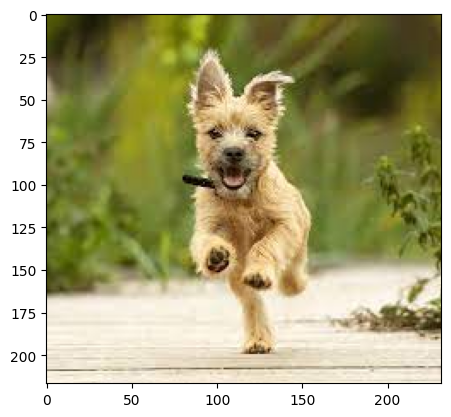

In [27]:
img = mpimg.imread('images/doggo.jpg')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

In [28]:
def to_gray_scale(X):
    return 0.2126 * X[:, :, 0] + 0.7152 * X[:, :, 1] + 0.0722 * X[:, :, 2]

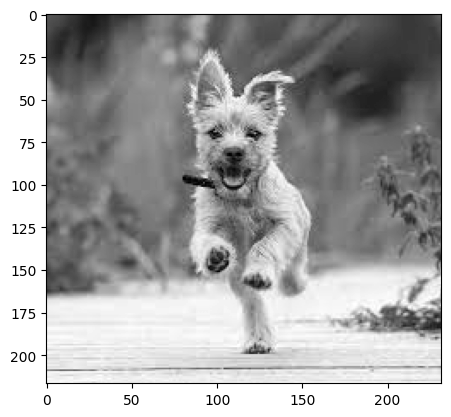

In [29]:
gray_img = to_gray_scale(img)
plt.imshow(gray_img, cmap = plt.get_cmap(name = 'gray'))

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [30]:
def linear_interpolation(x1, x2, _lambda=np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1])):
    # return np.repeat(_lambda.reshape(_lambda.shape[0],1), x1.ndim, axis =1) @ x1.reshape(1, *x1.shape) \
    #         + np.repeat((1 - _lambda).reshape(_lambda.shape[0], 1), x2.ndim, axis=1) @ x2.reshape(1, *x2.shape)

    return _lambda.reshape(_lambda.shape[0],1) @ x1.reshape(1, x1.shape[0]) \
            + (1 - _lambda).reshape(_lambda.shape[0], 1) @ x2.reshape(1, x2.shape[0])

In [31]:
print(linear_interpolation(np.array([1, 2, 7]), np.array([3, 5, 8])))

[[3.  5.  8. ]
 [2.8 4.7 7.9]
 [2.6 4.4 7.8]
 [2.4 4.1 7.7]
 [2.2 3.8 7.6]
 [2.  3.5 7.5]
 [1.8 3.2 7.4]
 [1.2 2.3 7.1]
 [1.  2.  7. ]]
